# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12

df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [2]:
# Helper display
def title(msg):
    print('\n' + '='*len(msg))
    print(msg)
    print('='*len(msg))

title('df.info()')
df.info()
title('Head & Tail')
display(df.head(3))
display(df.tail(3))
title('Missingness counts')
df.isna().sum()


df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int32         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 7.0+ KB

Head & Tail


,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85


,date,region,age,income,transactions,spend
157,2021-07-08,East,30.9,53308.27,2,134.47
158,2021-07-09,East,34.8,28731.93,2,82.64
159,2021-07-10,West,44.7,62816.06,3,118.15



Missingness counts


date            0
region          0
age             0
income          5
transactions    0
spend           3
dtype: int64

## 2) Numeric profile

In [3]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions 

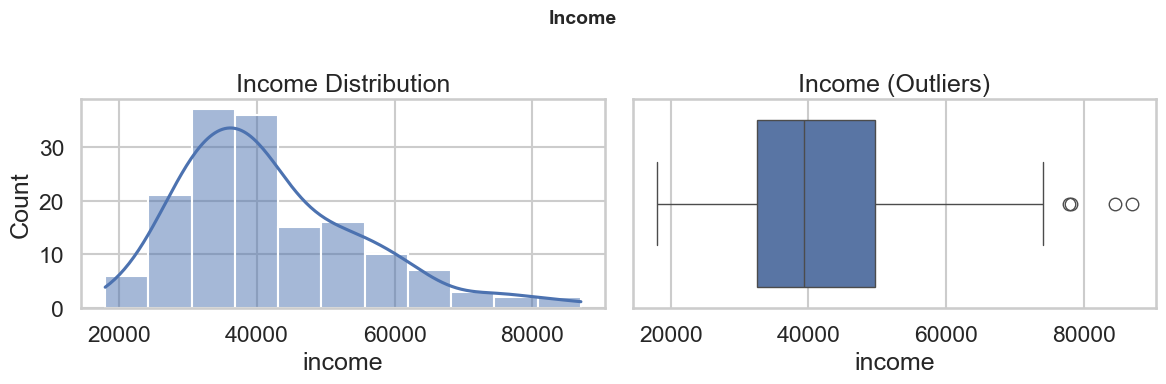

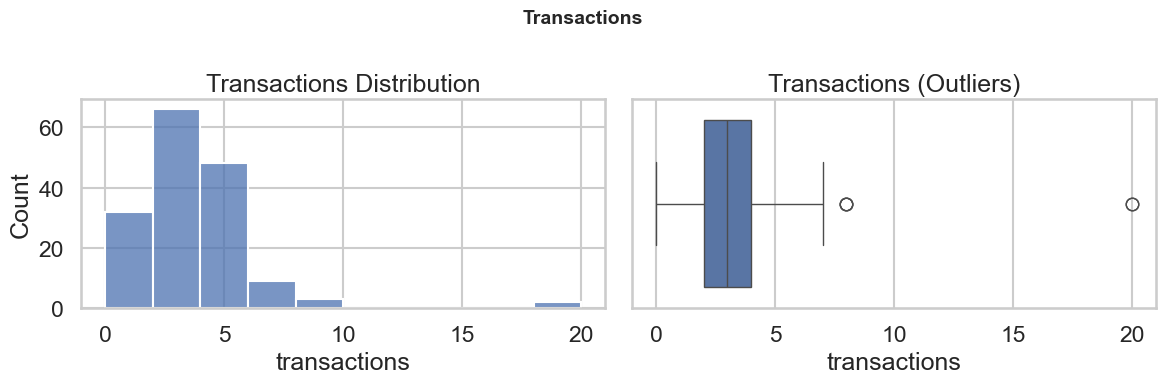

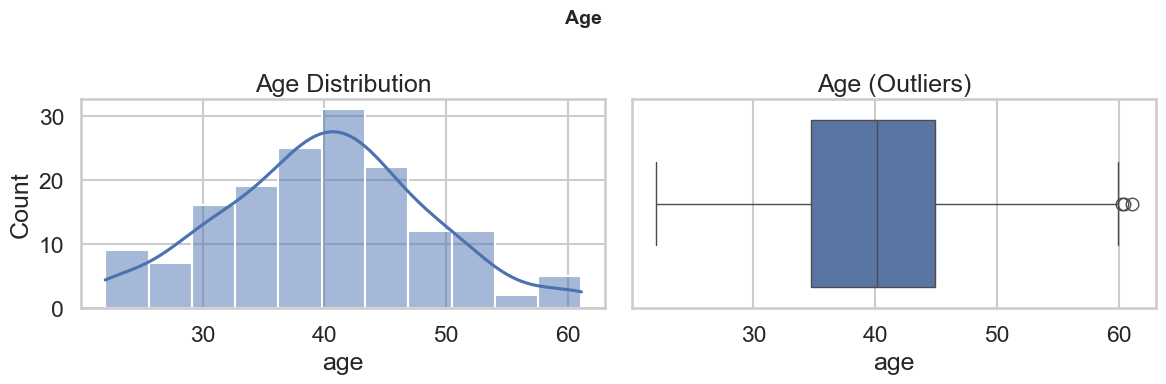

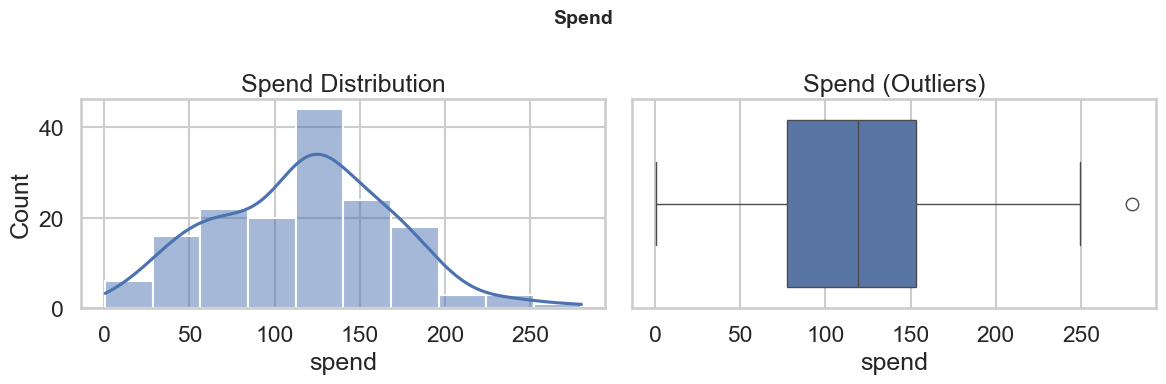

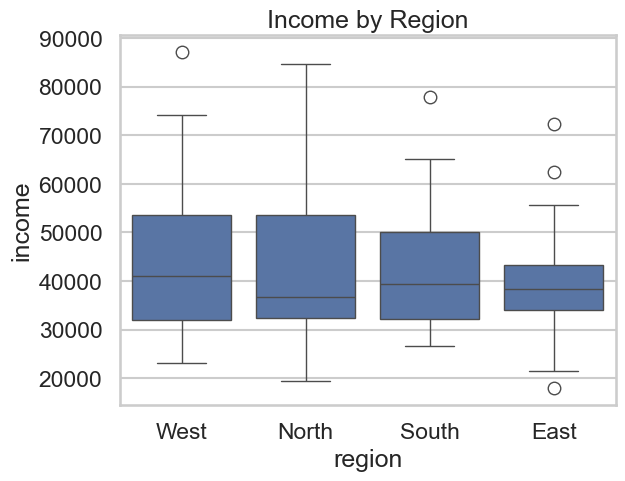

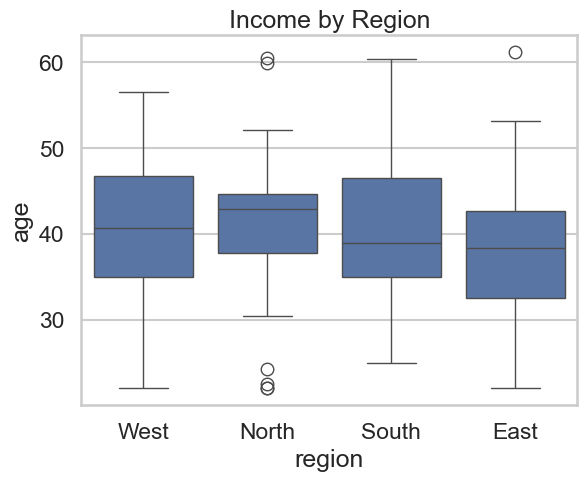

In [4]:
# Income
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['income'], kde=True, ax=axes[0])
axes[0].set_title('Income Distribution')
sns.boxplot(x='income', data=df, ax=axes[1])
axes[1].set_title('Income (Outliers)')
plt.suptitle('Income', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Transactions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['transactions'], bins=10, ax=axes[0])
axes[0].set_title('Transactions Distribution')
sns.boxplot(x='transactions', data=df, ax=axes[1])
axes[1].set_title('Transactions (Outliers)')
plt.suptitle('Transactions', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Age
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.boxplot(x='age', data=df, ax=axes[1])
axes[1].set_title('Age (Outliers)')
plt.suptitle('Age', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Spend
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['spend'], kde=True, ax=axes[0])
axes[0].set_title('Spend Distribution')
sns.boxplot(x='spend', data=df, ax=axes[1])
axes[1].set_title('Spend (Outliers)')
plt.suptitle('Spend', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# income boxplot per region 
sns.boxplot(x='region', y='income', data=df)
plt.title('Income by Region')
plt.show()

# age boxplot per region 
sns.boxplot(x='region', y='age', data=df)
plt.title('Income by Region')
plt.show()

## 4) Relationships

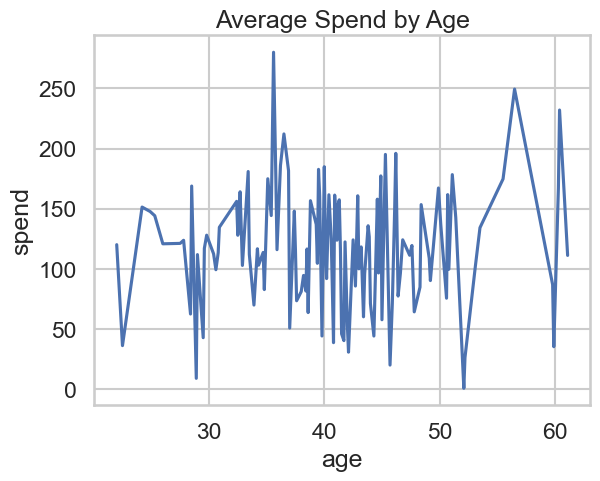

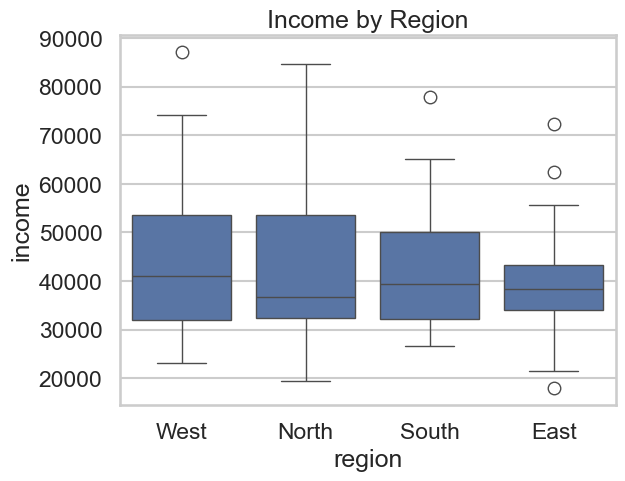

In [7]:
# Average Spen by Age
avg_spend_by_age = df.groupby('age')['spend'].mean().reset_index()
sns.lineplot(data=avg_spend_by_age, x='age', y='spend')
plt.title('Average Spend by Age')
plt.show()

# income per region
sns.boxplot(data=df, x='region', y='income')
plt.title('Income by Region')
plt.show()

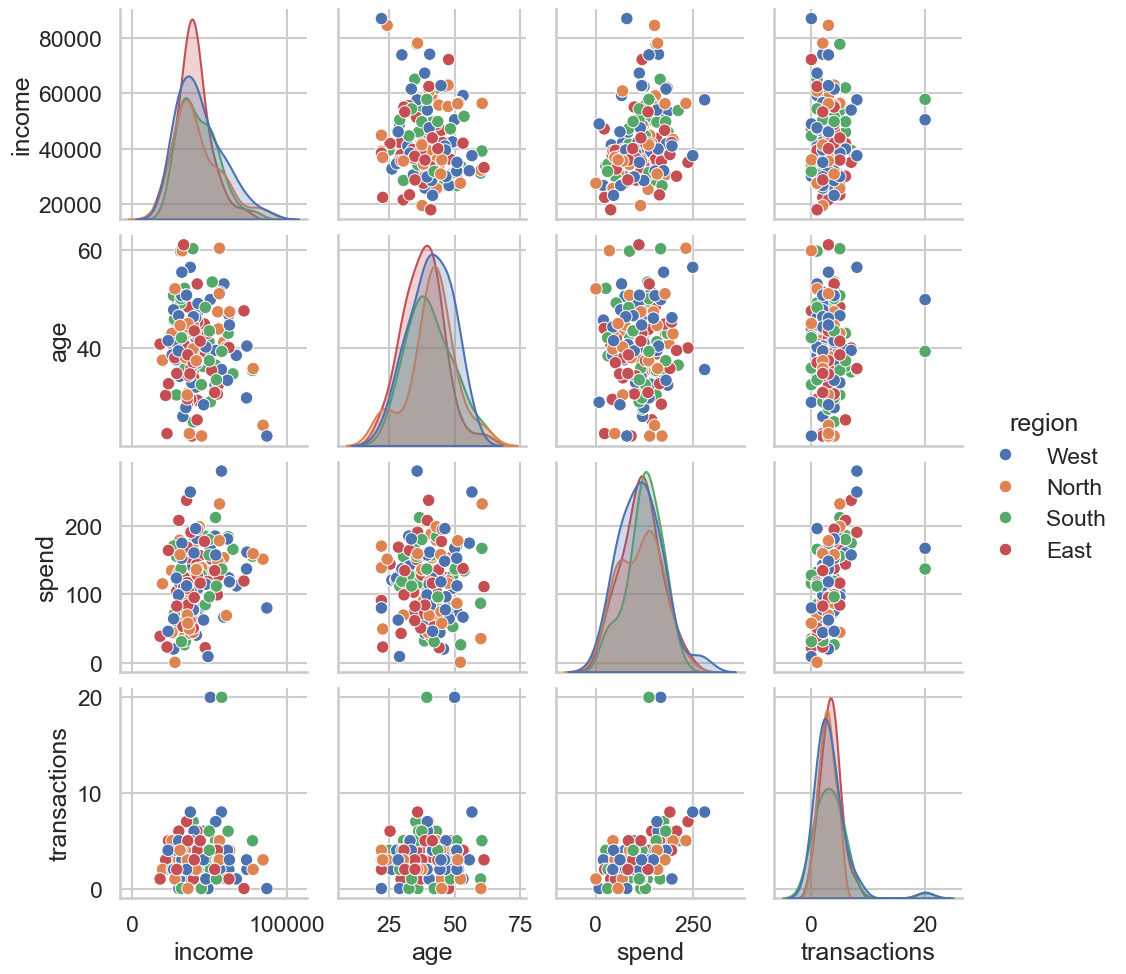

In [8]:
# all the pairs together, with region coloring
sns.pairplot(df[['income','age','spend','transactions','region']], hue='region')
plt.show()

## 5) (Optional) Correlation matrix

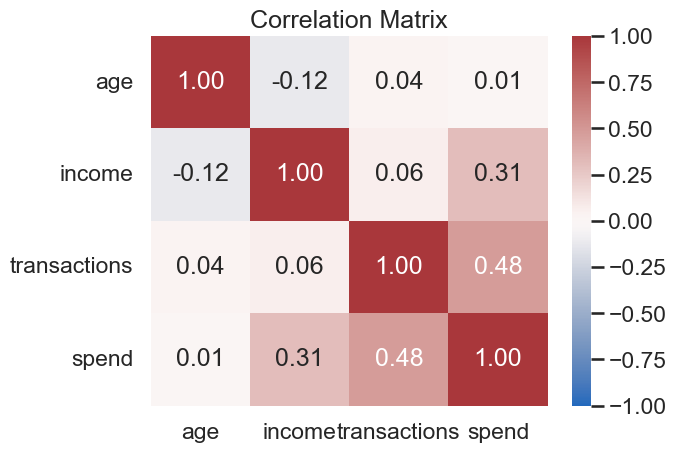

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [6]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions
### Insights :
- Income and Spend are somewhat linked


      - People with higher income tend to spend a bit more (correlation ~0.31).
      - Most people earn and spend in a mid-range, but a few very high values pull the averages upward.



- Transactions matter more for Spend than Income does


      - The link between number of transactions and spend is stronger (~0.48).
      - This means spending is driven more by how often people buy rather than how much they earn.


- Regions differ, but not by much


      - There are some income and age differences between regions, but they overlap a lot.
      - Region has some effect, but not as much as personal factors like transactions.


### Assumptions & risks

- In the pairplot, we see two cases with very high numbers of transactions. It’s worth checking if these are real (like a very wealthy person or a rare case) or if they might just be data errors.

### Next steps before modeling (cleaning & features)

- Data Cleaning


      - Check for missing values and decide how to handle them.
      - Review outliers and decide whether to keep them, transform them, or remove them.


- Feature Engineering

      - Create new features, like spend per transaction, log of income, or age groups.
      - Convert the categorical region variable into one-hot encoding.
